<a href="https://colab.research.google.com/github/GunH-colab/basicsML/blob/master/Regression/bostonhousing_pricepredict_keras(Sequential).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   **Sequential API**
*   **Boston Housing Dataset**
*   **Standarized using StandardScaler**
*   **Regularized(L2 and Droupout)**

In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# splitting the datasets into train and test sets

(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

print(train_data.shape,"\n", test_data.shape,"\n", train_targets.shape,"\n", test_targets.shape)

57344/57026 [==============================] - 0s 0us/step
(404, 13) 
 (102, 13) 
 (404,) 
 (102,)


In [3]:
# pre-processing the datasets using StandardScaler

sc = StandardScaler()
sc.fit(train_data)
train_data_std = sc.transform(train_data)
test_data_std = sc.transform(test_data)


In [4]:
#THE MODEL

model = keras.models.Sequential([
        keras.layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01), input_shape=[train_data.shape[1]]),
        keras.layers.Dropout(0.008),
        keras.layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.008),
        keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2(0.01)),
        ])

In [5]:
# compiling the model

model.compile(optimizer="rmsprop", loss="mse", metrics=['mape'])

In [6]:
# training the model

history = model.fit(train_data, train_targets, validation_split=0.2, epochs=500)

Epoch 1/500
11/11 [==============================] - 0s 19ms/step - loss: 19231.5547 - mape: 756.6817 - val_loss: 10148.2119 - val_mape: 497.7922
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 8538.1582 - mape: 499.6138 - val_loss: 4985.9800 - val_mape: 342.4605
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 4227.2358 - mape: 344.5678 - val_loss: 2326.1614 - val_mape: 223.2404
Epoch 4/500
11/11 [==============================] - 0s 5ms/step - loss: 2450.9946 - mape: 242.6242 - val_loss: 1047.4547 - val_mape: 138.5111
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 1221.9446 - mape: 161.9391 - val_loss: 485.1240 - val_mape: 93.4565
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 807.1979 - mape: 120.4381 - val_loss: 340.7354 - val_mape: 77.2923
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 536.5293 - mape: 100.8087 - val_loss: 219.8800 - val_mape: 58.4826
Epoc

In [7]:
# model evaluation

model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 33.8698 - mape: 18.5090


[33.86979293823242, 18.50899314880371]

In [8]:
# recording the predictions

preds = model.predict(test_data)

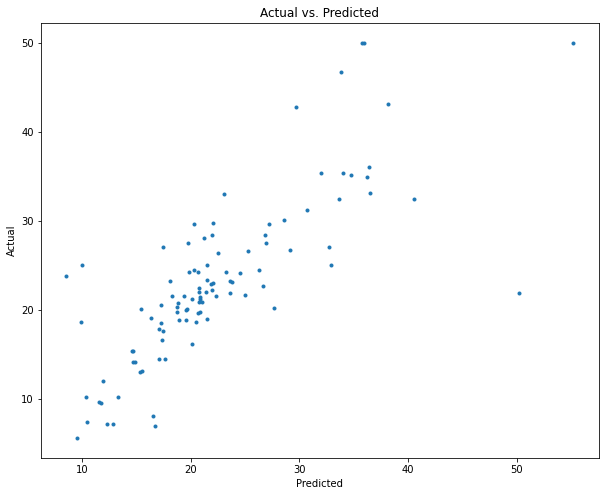

In [9]:
# scatter-plot of Actual vs. Predicted values

plt.figure(figsize=(10, 8))
plt.scatter(preds, test_targets, marker='.')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs. Predicted')
plt.show()

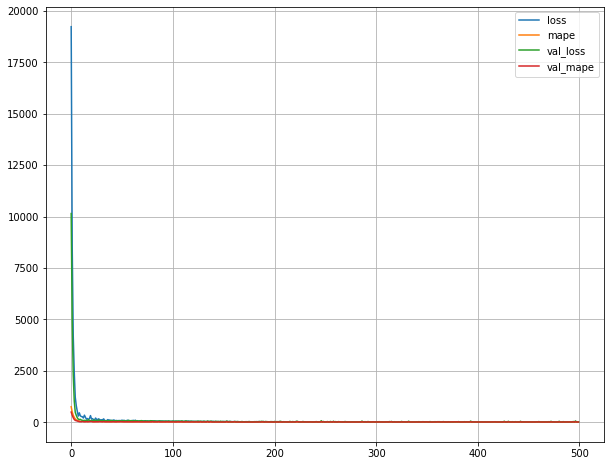

In [10]:
# model graph 

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca()

In [11]:
new_pred = test_data[:10]
new_out = model.predict(new_pred)

In [12]:
print(new_out,"\n\nPredicted Prices\n\n")
print(test_targets[:10],"\n\nActual Prices")


[[12.254561]
 [18.886442]
 [21.537569]
 [32.728195]
 [21.928442]
 [20.279219]
 [30.663725]
 [21.853287]
 [17.274591]
 [18.116688]] 

Predicted Prices


[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2] 

Actual Prices
